In [1]:
import pandas as pd
import numpy as np
import ot
import matplotlib.pyplot as plt

In [2]:
fjc = pd.read_csv('/Users/shiramichel/Documents/JUSTFAIR/2018_data/FJC_2018.csv')
ussc = pd.read_csv('/Users/shiramichel/Documents/JUSTFAIR/2018_data/mod_ussc_2018.csv')

/var/folders/r7/bqljw8h17hsc6g3m8ck8vhjc0000gn/T/ipykernel_29429/1934528397.py:1: DtypeWarning: Columns (4,11,42,54,65,96,108,113,120,125) have mixed types. Specify dtype option on import or set low_memory=False.
  fjc = pd.read_csv('/Users/shiramichel/Documents/JUSTFAIR/2018_data/FJC_2018.csv')


In [3]:
ussc = ussc[['USSCIDN','SENTMON', 'SENTYR', 'DISTRICT','SENTTOT_new', 'FINE', 'PROBATN', 'floorSENTTOT', 'roundSENTTOT','USSCcode1', 'USSCcode2', 'USSCcode3', 'USSCcode4', 'USSCcode5', 'matchFlag']]
ussc = ussc.rename({'SENTTOT_new': 'PRISTOT', 'FINE': 'FINETOT', 'PROBATN': 'PROBTOT'}, axis=1)
fjc = fjc[['ID','SENTMON', 'SENTYR', 'DISTRICT', 'PRISTOT', 'FINETOT', 'PROBTOT', 'FJDcode1', 'FJDcode2', 'FJDcode3', 'FJDcode4', 'FJDcode5', 'FJDcode6', 'FJDcode7', 'FJDcode8', 'FJDcode9', 'FJDcode10', 'matchFlag']]
fjc.replace(-8, 'NA', inplace=True)
fjc.replace('-8', 'NA', inplace=True)
fjc = fjc

/var/folders/r7/bqljw8h17hsc6g3m8ck8vhjc0000gn/T/ipykernel_29429/3270560775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fjc.replace(-8, 'NA', inplace=True)
/var/folders/r7/bqljw8h17hsc6g3m8ck8vhjc0000gn/T/ipykernel_29429/3270560775.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fjc.replace('-8', 'NA', inplace=True)


In [4]:
matches = pd.read_csv('/Users/shiramichel/Documents/JUSTFAIR/2018_data/matched_2018.csv')
matches

,ID,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,...,FJDcode10,USSCIDN,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,DOCKET
0,4450209.0,1,2018,42,10.0,0,0,81324.0,81324.0,NaN,...,NaN,2443270.0,10.0,10.0,81324.0,NaN,NaN,NaN,NaN,1700428.0
1,4462931.0,1,2018,42,0.0,0,36,18641.0,NaN,NaN,...,NaN,2440267.0,NaN,NaN,18641.0,NaN,NaN,NaN,NaN,1700071.0
2,4476567.0,1,2018,51,188.0,0,0,21841.0,21841.0,21841.0,...,NaN,2438619.0,188.0,188.0,21841.0,NaN,NaN,NaN,NaN,1710003.0
3,4445935.0,1,2018,41,20.0,0,0,18922.0,NaN,NaN,...,NaN,2438903.0,20.0,20.0,18922.0,18924.0,NaN,NaN,NaN,1701357.0
4,4446120.0,1,2018,41,20.0,0,0,81324.0,NaN,NaN,...,NaN,2443547.0,20.0,20.0,81324.0,182.0,NaN,NaN,NaN,1701536.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9051,4614269.0,10,2018,14,1.0,0,0,81326.0,NaN,NaN,...,NaN,2497145.0,1.0,2.0,81326.0,NaN,NaN,NaN,NaN,1800273.0
9052,4699529.0,12,2018,50,13.0,0,0,18922.0,NaN,NaN,...,NaN,2510716.0,13.0,14.0,18922.0,NaN,NaN,NaN,NaN,1700164.0
9053,4713229.0,10,2018,61,0.0,0,0,18641.0,42408.0,NaN,...,NaN,2496976.0,0.0,1.0,18641.0,NaN,NaN,NaN,NaN,1850039.0
9054,4724088.0,10,2018,69,0.0,0,0,18661.0,NaN,NaN,...,NaN,2500998.0,0.0,1.0,183146.0,181153.0,18661.0,182.0,NaN,1730108.0


In [5]:
matches_50=matches.sample(50) #taking a sample of 100 to work with
matches_50

,ID,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,...,FJDcode10,USSCIDN,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,DOCKET
8676,4583230.0,11,2018,1,12.0,0,0,181542.0,NaN,NaN,...,NaN,2505066.0,12.0,12.0,181542.0,NaN,NaN,NaN,NaN,1710160.0
6393,4753008.0,12,2018,74,0.0,0,60,181546.0,NaN,NaN,...,NaN,2510454.0,NaN,NaN,181546.0,NaN,NaN,NaN,NaN,1805028.0
6942,4698540.0,12,2018,49,170.0,0,0,21846.0,NaN,NaN,...,NaN,2507525.0,170.0,170.0,21846.0,21841.0,NaN,NaN,NaN,1700091.0
4743,4640009.0,11,2018,25,188.0,0,0,182251.0,182251.0,182251.0,...,NaN,2501102.0,188.0,188.0,182251.0,182251.0,NaN,NaN,NaN,1800039.0
8137,4613958.0,12,2018,14,188.0,0,0,21841.0,21841.0,NaN,...,NaN,2511756.0,188.0,188.0,21841.0,182.0,NaN,NaN,NaN,1700027.0
1339,4425890.0,5,2018,39,24.0,0,0,21841.0,NaN,NaN,...,NaN,2463202.0,24.0,24.0,21841.0,21846.0,NaN,NaN,NaN,1700063.0
5963,4771615.0,11,2018,83,40.0,0,0,21841.0,21841.0,NaN,...,NaN,2504677.0,40.0,40.0,21841.0,21841.0,NaN,NaN,NaN,1740057.0
5657,4779655.0,11,2018,85,18.0,0,0,182250.0,NaN,NaN,...,NaN,2503517.0,18.0,18.0,182250.0,NaN,NaN,NaN,NaN,1800126.0
4203,4615242.0,11,2018,15,63.0,0,0,21841.0,18924.0,NaN,...,NaN,2499552.0,63.0,63.0,21841.0,18924.0,21841.0,NaN,NaN,1700291.0
5364,4690659.0,11,2018,45,160.0,0,0,181347.0,181347.0,181349.0,...,NaN,2502641.0,160.0,160.0,181349.0,181347.0,NaN,NaN,NaN,1620437.0


In [6]:
matches_100=matches.sample(100) #taking a sample of 100 to work with
matches_100

,ID,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,...,FJDcode10,USSCIDN,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,DOCKET
3952,4806359.0,10,2018,34,128.0,0,0,181591.0,182252.0,182422.0,...,NaN,2498735.0,128.0,128.0,181591.0,181591.0,NaN,NaN,NaN,1700061.0
3530,4725470.0,10,2018,95,120.0,0,0,18922.0,NaN,NaN,...,NaN,2497007.0,120.0,120.0,18922.0,18924.0,NaN,NaN,NaN,1800052.0
1468,4555835.0,5,2018,88,0.0,0,60,21841.0,21841.0,NaN,...,NaN,2467027.0,NaN,NaN,21846.0,21841.0,21841.0,NaN,NaN,1700534.0
1429,4569672.0,5,2018,31,30.0,0,0,21846.0,NaN,NaN,...,NaN,2467876.0,30.0,30.0,21846.0,18922.0,21841.0,21841.0,NaN,1720632.0
5147,4659027.0,11,2018,41,39.0,0,0,81326.0,NaN,NaN,...,NaN,2506563.0,39.0,39.0,81326.0,81326.0,NaN,NaN,NaN,1800356.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,4412332.0,4,2018,19,9996.0,0,0,18924.0,181951.0,NaN,...,NaN,2462812.0,470.0,470.0,1821191.0,18924.0,21841.0,182.0,21841.0,1500245.0
4187,4608621.0,11,2018,12,100.0,0,0,18922.0,NaN,NaN,...,NaN,2499483.0,100.0,100.0,18922.0,NaN,NaN,NaN,NaN,1800058.0
2358,4770080.0,10,2018,82,24.0,0,0,181349.0,181956.0,NaN,...,NaN,2494524.0,24.0,24.0,181349.0,181956.0,182.0,NaN,NaN,1800306.0
5914,4690539.0,11,2018,45,0.0,0,36,181709.0,NaN,NaN,...,NaN,2504642.0,NaN,NaN,181709.0,NaN,NaN,NaN,NaN,1720058.0


In [7]:
fjc_50_vals= matches_50.ID
ussc_50_vals=matches_50.USSCIDN

In [8]:
fjc_vals= matches_100.ID
ussc_vals=matches_100.USSCIDN

In [9]:
matches_50_df = matches_50[['ID', 'USSCIDN' ]]

In [10]:
matches_100_df = matches_100[['ID', 'USSCIDN' ]]

In [11]:
ussc_25 = pd.merge(matches_50_df, ussc, on=['USSCIDN'])
ussc_25=ussc_25.drop(['ID'], axis=1)
ussc_25

,USSCIDN,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,matchFlag
0,2505066.0,11,2018,1,12.03,0,0,12.0,12.0,181542.0,NaN,NaN,NaN,NaN,NaN
1,2510454.0,12,2018,74,0.00,0,60,NaN,NaN,181546.0,NaN,NaN,NaN,NaN,NaN
2,2507525.0,12,2018,49,170.00,0,0,170.0,170.0,21846.0,21841.0,NaN,NaN,NaN,NaN
3,2501102.0,11,2018,25,188.00,0,0,188.0,188.0,182251.0,182251.0,NaN,NaN,NaN,NaN
4,2511756.0,12,2018,14,188.00,0,0,188.0,188.0,21841.0,182.0,NaN,NaN,NaN,NaN
5,2463202.0,5,2018,39,24.00,0,0,24.0,24.0,21841.0,21846.0,NaN,NaN,NaN,NaN
6,2504677.0,11,2018,83,40.00,0,0,40.0,40.0,21841.0,21841.0,NaN,NaN,NaN,NaN
7,2503517.0,11,2018,85,18.00,0,0,18.0,18.0,182250.0,NaN,NaN,NaN,NaN,NaN
8,2499552.0,11,2018,15,63.00,0,0,63.0,63.0,21841.0,18924.0,21841.0,NaN,NaN,NaN
9,2502641.0,11,2018,45,160.00,0,0,160.0,160.0,181349.0,181347.0,NaN,NaN,NaN,NaN


In [12]:
ussc_50 = pd.merge(matches_100_df, ussc, on=['USSCIDN'])
ussc_50=ussc_50.drop(['ID'], axis=1)
ussc_50

,USSCIDN,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,matchFlag
0,2498735.0,10,2018,34,128.0,0,0,128.0,128.0,181591.0,181591.0,NaN,NaN,NaN,NaN
1,2497007.0,10,2018,95,120.0,0,0,120.0,120.0,18922.0,18924.0,NaN,NaN,NaN,NaN
2,2467027.0,5,2018,88,0.0,0,60,NaN,NaN,21846.0,21841.0,21841.0,NaN,NaN,NaN
3,2467876.0,5,2018,31,30.0,0,0,30.0,30.0,21846.0,18922.0,21841.0,21841.0,NaN,NaN
4,2506563.0,11,2018,41,39.0,0,0,39.0,39.0,81326.0,81326.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2462812.0,4,2018,19,9996.0,0,0,470.0,470.0,1821191.0,18924.0,21841.0,182.0,21841.0,NaN
96,2499483.0,11,2018,12,100.0,0,0,100.0,100.0,18922.0,NaN,NaN,NaN,NaN,NaN
97,2494524.0,10,2018,82,24.0,0,0,24.0,24.0,181349.0,181956.0,182.0,NaN,NaN,NaN
98,2504642.0,11,2018,45,0.0,0,36,NaN,NaN,181709.0,NaN,NaN,NaN,NaN,NaN


In [13]:
fjc_25 = pd.merge(matches_50_df, fjc, on=['ID'])
fjc_25=fjc_25.drop(['USSCIDN'], axis=1)
fjc_25

,ID,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,FJDcode4,FJDcode5,FJDcode6,FJDcode7,FJDcode8,FJDcode9,FJDcode10,matchFlag
0,4583230.0,11,2018,1,12.0,0,0,181542,NA,NA,NA,NA,181542,NA,NA,NA,NA,NaN
1,4753008.0,12,2018,74,0.0,0,60,181546,NA,NA,NA,NA,181546,NA,NA,NA,NA,NaN
2,4698540.0,12,2018,49,170.0,0,0,21846,NA,NA,NA,NA,21846,NA,NA,NA,NA,NaN
3,4640009.0,11,2018,25,188.0,0,0,182251,182251,182251,NA,NA,182251,182251,182251,NA,NA,NaN
4,4613958.0,12,2018,14,188.0,0,0,21841,21841,NA,NA,NA,21841,21841,NA,NA,NA,NaN
5,4425890.0,5,2018,39,24.0,0,0,21841,NA,NA,NA,NA,21841,NA,NA,NA,NA,NaN
6,4771615.0,11,2018,83,40.0,0,0,21841,21841,NA,NA,NA,21841,21841,NA,NA,NA,NaN
7,4779655.0,11,2018,85,18.0,0,0,182250,NA,NA,NA,NA,182250,NA,NA,NA,NA,NaN
8,4615242.0,11,2018,15,63.0,0,0,21841,18924,NA,NA,NA,18924,21841,NA,NA,NA,NaN
9,4690659.0,11,2018,45,160.0,0,0,181347,181347,181349,18371,NA,181347,181349,181347,18371,NA,NaN


In [14]:
fjc_50 = pd.merge(matches_100_df, fjc, on=['ID'])
fjc_50=fjc_50.drop(['USSCIDN'], axis=1)
fjc_50

,ID,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,FJDcode4,FJDcode5,FJDcode6,FJDcode7,FJDcode8,FJDcode9,FJDcode10,matchFlag
0,4806359.0,10,2018,34,128.0,0,0,181591,182252,182422,NA,NA,181591,182252,182422,NA,NA,NaN
1,4725470.0,10,2018,95,120.0,0,0,18922,NA,NA,NA,NA,18922,18922,18922,NA,NA,NaN
2,4555835.0,5,2018,88,0.0,0,60,21841,21841,NA,NA,NA,21841,21841,NA,NA,NA,NaN
3,4569672.0,5,2018,31,30.0,0,0,21846,NA,NA,NA,NA,21846,NA,NA,NA,NA,NaN
4,4659027.0,11,2018,41,39.0,0,0,81326,NA,NA,NA,NA,81326,NA,NA,NA,NA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4412332.0,4,2018,19,9996.0,0,0,18924,181951,NA,NA,NA,18924,181951,NA,NA,NA,NaN
96,4608621.0,11,2018,12,100.0,0,0,18922,NA,NA,NA,NA,18922,NA,NA,NA,NA,NaN
97,4770080.0,10,2018,82,24.0,0,0,181349,181956,NA,NA,NA,181349,181956,NA,NA,NA,NaN
98,4690539.0,11,2018,45,0.0,0,36,181709,NA,NA,NA,NA,181709,NA,NA,NA,NA,NaN


In [15]:
ussc_25.reset_index(drop=True, inplace=True)
fjc_25.reset_index(drop=True, inplace=True)
ussc_25 = ussc_50.iloc[0:25,:]
fjc_25 = fjc_50.iloc[0:25,:]

In [16]:
ussc_50.reset_index(drop=True, inplace=True)
fjc_50.reset_index(drop=True, inplace=True)
ussc_50 = ussc_50.iloc[0:50,:]
fjc_50 = fjc_50.iloc[0:50,:]

In [17]:
ussc_25

,USSCIDN,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,matchFlag
0,2498735.0,10,2018,34,128.00,0,0,128.0,128.0,181591.0,181591.0,NaN,NaN,NaN,NaN
1,2497007.0,10,2018,95,120.00,0,0,120.0,120.0,18922.0,18924.0,NaN,NaN,NaN,NaN
2,2467027.0,5,2018,88,0.00,0,60,NaN,NaN,21846.0,21841.0,21841.0,NaN,NaN,NaN
3,2467876.0,5,2018,31,30.00,0,0,30.0,30.0,21846.0,18922.0,21841.0,21841.0,NaN,NaN
4,2506563.0,11,2018,41,39.00,0,0,39.0,39.0,81326.0,81326.0,NaN,NaN,NaN,NaN
5,2507270.0,11,2018,38,180.00,1500,0,180.0,180.0,18922.0,18924.0,NaN,NaN,NaN,NaN
6,2498641.0,10,2018,15,60.00,0,0,60.0,60.0,182252.0,182252.0,NaN,NaN,NaN,NaN
7,2500392.0,11,2018,84,4.00,0,0,4.0,4.0,1813.0,81326.0,81326.0,NaN,NaN,NaN
8,2512588.0,12,2018,18,188.00,0,0,188.0,188.0,18922.0,18924.0,NaN,NaN,NaN,NaN
9,2471692.0,6,2018,4,61.00,0,0,61.0,61.0,21841.0,18922.0,21841.0,18924.0,NaN,NaN


In [18]:
fjc_25

,ID,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,FJDcode4,FJDcode5,FJDcode6,FJDcode7,FJDcode8,FJDcode9,FJDcode10,matchFlag
0,4806359.0,10,2018,34,128.0,0,0,181591,182252,182422,NA,NA,181591,182252,182422,NA,NA,NaN
1,4725470.0,10,2018,95,120.0,0,0,18922,NA,NA,NA,NA,18922,18922,18922,NA,NA,NaN
2,4555835.0,5,2018,88,0.0,0,60,21841,21841,NA,NA,NA,21841,21841,NA,NA,NA,NaN
3,4569672.0,5,2018,31,30.0,0,0,21846,NA,NA,NA,NA,21846,NA,NA,NA,NA,NaN
4,4659027.0,11,2018,41,39.0,0,0,81326,NA,NA,NA,NA,81326,NA,NA,NA,NA,NaN
5,4642309.0,11,2018,38,180.0,1500,0,18922,NA,NA,NA,NA,18922,NA,NA,NA,NA,NaN
6,4614988.0,10,2018,15,60.0,0,0,182252,182252,NA,NA,NA,182252,182252,NA,NA,NA,NaN
7,4773750.0,11,2018,84,4.0,0,0,1813,1813,NA,NA,NA,81326,1813,1813,1813,NA,NaN
8,4627892.0,12,2018,18,188.0,0,0,18922,NA,NA,NA,NA,18922,NA,NA,NA,NA,NaN
9,4371627.0,6,2018,4,61.0,0,0,18924,21841,NA,NA,NA,18924,21841,NA,NA,NA,NaN


In [19]:
ussc_50

,USSCIDN,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,matchFlag
0,2498735.0,10,2018,34,128.00,0,0,128.0,128.0,181591.0,181591.0,NaN,NaN,NaN,NaN
1,2497007.0,10,2018,95,120.00,0,0,120.0,120.0,18922.0,18924.0,NaN,NaN,NaN,NaN
2,2467027.0,5,2018,88,0.00,0,60,NaN,NaN,21846.0,21841.0,21841.0,NaN,NaN,NaN
3,2467876.0,5,2018,31,30.00,0,0,30.0,30.0,21846.0,18922.0,21841.0,21841.0,NaN,NaN
4,2506563.0,11,2018,41,39.00,0,0,39.0,39.0,81326.0,81326.0,NaN,NaN,NaN,NaN
5,2507270.0,11,2018,38,180.00,1500,0,180.0,180.0,18922.0,18924.0,NaN,NaN,NaN,NaN
6,2498641.0,10,2018,15,60.00,0,0,60.0,60.0,182252.0,182252.0,NaN,NaN,NaN,NaN
7,2500392.0,11,2018,84,4.00,0,0,4.0,4.0,1813.0,81326.0,81326.0,NaN,NaN,NaN
8,2512588.0,12,2018,18,188.00,0,0,188.0,188.0,18922.0,18924.0,NaN,NaN,NaN,NaN
9,2471692.0,6,2018,4,61.00,0,0,61.0,61.0,21841.0,18922.0,21841.0,18924.0,NaN,NaN


In [20]:
fjc_50

,ID,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,FJDcode4,FJDcode5,FJDcode6,FJDcode7,FJDcode8,FJDcode9,FJDcode10,matchFlag
0,4806359.0,10,2018,34,128.0,0,0,181591,182252,182422,NA,NA,181591,182252,182422,NA,NA,NaN
1,4725470.0,10,2018,95,120.0,0,0,18922,NA,NA,NA,NA,18922,18922,18922,NA,NA,NaN
2,4555835.0,5,2018,88,0.0,0,60,21841,21841,NA,NA,NA,21841,21841,NA,NA,NA,NaN
3,4569672.0,5,2018,31,30.0,0,0,21846,NA,NA,NA,NA,21846,NA,NA,NA,NA,NaN
4,4659027.0,11,2018,41,39.0,0,0,81326,NA,NA,NA,NA,81326,NA,NA,NA,NA,NaN
5,4642309.0,11,2018,38,180.0,1500,0,18922,NA,NA,NA,NA,18922,NA,NA,NA,NA,NaN
6,4614988.0,10,2018,15,60.0,0,0,182252,182252,NA,NA,NA,182252,182252,NA,NA,NA,NaN
7,4773750.0,11,2018,84,4.0,0,0,1813,1813,NA,NA,NA,81326,1813,1813,1813,NA,NaN
8,4627892.0,12,2018,18,188.0,0,0,18922,NA,NA,NA,NA,18922,NA,NA,NA,NA,NaN
9,4371627.0,6,2018,4,61.0,0,0,18924,21841,NA,NA,NA,18924,21841,NA,NA,NA,NaN


In [21]:
cost_matrix_25 = np.zeros((25,25))

for i in range (25):
    for j in range(25):
        value=0
        for x in range(1,7):
            if ussc_25.iloc[i,x] != fjc_25.iloc[j,x]:
                value=value+1
        new_value=1
        for k in range(9,14):
            if ussc_25.iloc[i,k] == fjc_25.iloc[j,7] or ussc_25.iloc[i,k]== fjc_25.iloc[j,8] or ussc_25.iloc[i,k]== fjc_25.iloc[j,9] or ussc_25.iloc[i,k]== fjc_25.iloc[i,10] or ussc_25.iloc[i,k]== fjc_25.iloc[j,11] or ussc_25.iloc[i,k]== fjc_25.iloc[j,12] or ussc_25.iloc[i,k]== fjc_25.iloc[j,13] or ussc_25.iloc[i,k]== fjc_25.iloc[j,14] or ussc_25.iloc[i,k]== fjc_25.iloc[j,15] or ussc_25.iloc[i,k]== fjc_25.iloc[j,16]:
                new_value=new_value-0.2
        cost_matrix_25[i][j] = value + new_value

np.random.shuffle(cost_matrix_25)
cost_matrix_25

array([[4. , 3.8, 5. , 4. , 4. , 4.8, 4. , 4. , 0.8, 3.8, 4. , 4. , 4. ,
        3.8, 3. , 4. , 3.8, 3.8, 4. , 4. , 4.8, 4. , 3. , 4. , 4. ],
       [4. , 3.8, 3.6, 0.8, 4. , 4.8, 4. , 4. , 3.8, 3.6, 4. , 4. , 4. ,
        1.4, 3. , 3.4, 3.8, 4. , 4. , 3. , 4.2, 3.6, 4. , 4. , 2.6],
       [4. , 4. , 5. , 4. , 0.6, 4. , 4. , 2.6, 4. , 4. , 3. , 3. , 4. ,
        4. , 4. , 4. , 3. , 4. , 3. , 3.6, 5. , 4. , 4. , 3. , 3. ],
       [4. , 4. , 6. , 4.8, 5. , 5. , 4. , 5. , 5. , 5. , 5. , 5. , 5. ,
        5. , 5. , 3.8, 5. , 5. , 5. , 5. , 0.8, 4. , 5. , 5. , 5. ],
       [3.8, 3.8, 4.8, 3.8, 2.8, 3.8, 3.8, 2.8, 3.8, 3.8, 2.8, 2.8, 3.8,
        3.8, 3.8, 3.8, 2.8, 3.8, 0.4, 3.8, 4.8, 3.8, 3.8, 2.8, 2.8],
       [3.6, 4. , 5. , 4. , 4. , 5. , 3.6, 4. , 3. , 4. , 4. , 4. , 4. ,
        4. , 3. , 4. , 4. , 4. , 4. , 4. , 5. , 4. , 0.6, 3.6, 4. ],
       [5. , 4.8, 6. , 5. , 4. , 0.8, 5. , 4. , 4.8, 4.8, 4. , 3. , 5. ,
        4.8, 5. , 5. , 3.8, 4.8, 4. , 5. , 4.8, 5. , 5. , 4. , 4. ],
      

In [22]:
cost_matrix = np.zeros((50,50))

for i in range (50):
    for j in range(50):
        value=0
        for x in range(1,7):
            if ussc_50.iloc[i,x] != fjc_50.iloc[j,x]:
                value=value+1
        new_value=1
        for k in range(9,14):
            if ussc_50.iloc[i,k] == fjc_50.iloc[j,7] or ussc_50.iloc[i,k]== fjc_50.iloc[j,8] or ussc_50.iloc[i,k]== fjc_50.iloc[j,9] or ussc_50.iloc[i,k]== fjc_50.iloc[i,10] or ussc_50.iloc[i,k]== fjc_50.iloc[j,11] or ussc_50.iloc[i,k]== fjc_50.iloc[j,12] or ussc_50.iloc[i,k]== fjc_50.iloc[j,13] or ussc_50.iloc[i,k]== fjc_50.iloc[j,14] or ussc_50.iloc[i,k]== fjc_50.iloc[j,15] or ussc_50.iloc[i,k]== fjc_50.iloc[j,16]:
                new_value=new_value-0.2
        cost_matrix[i][j] = value + new_value

np.random.shuffle(cost_matrix)
cost_matrix

array([[4. , 3.6, 5. , ..., 4. , 3.6, 4. ],
       [4. , 4. , 5. , ..., 3. , 4. , 4. ],
       [4. , 3.6, 5. , ..., 3. , 3.6, 4. ],
       ...,
       [4. , 3.8, 3.6, ..., 3.8, 3.8, 4. ],
       [3. , 3. , 5. , ..., 4. , 3. , 3. ],
       [4. , 4. , 4.6, ..., 3. , 4. , 4. ]])

In [23]:
a = np.ones(25)
b= np.ones(25)
M= cost_matrix_25

S_25 = ot.emd(a,b,M)
S_25

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 

In [24]:
a = np.ones(50)
b= np.ones(50)
M= cost_matrix

S = ot.emd(a,b,M)
S

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
# lambda = 2 * 10^-1
a = np.ones(25)
b= np.ones(25)
M = cost_matrix_25
lambd = 2e-1
e1_25 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S_25-e1_25)

It.  |Err         
-------------------
    0|5.172585e-02|
   10|3.416806e-02|
   20|2.516778e-02|
   30|1.964572e-02|
   40|1.592661e-02|
   50|1.327846e-02|
   60|1.132185e-02|
   70|9.836152e-03|
   80|8.682597e-03|
   90|7.769126e-03|
  100|7.032465e-03|
  110|6.428080e-03|
  120|5.924097e-03|
  130|5.497400e-03|
  140|5.131043e-03|
  150|4.812462e-03|
  160|4.532245e-03|
  170|4.283262e-03|
  180|4.060048e-03|
  190|3.858365e-03|
It.  |Err         
-------------------
  200|3.674887e-03|
  210|3.506973e-03|
  220|3.352503e-03|
  230|3.209752e-03|
  240|3.077304e-03|
  250|2.953983e-03|
  260|2.838804e-03|
  270|2.730931e-03|
  280|2.629654e-03|
  290|2.534358e-03|
  300|2.444513e-03|
  310|2.359655e-03|
  320|2.279377e-03|
  330|2.203319e-03|
  340|2.131162e-03|
  350|2.062621e-03|
  360|1.997440e-03|
  370|1.935390e-03|
  380|1.876263e-03|
  390|1.819871e-03|
It.  |Err         
-------------------
  400|1.766044e-03|
  410|1.714624e-03|
  420|1.665470e-03|
  430|1.618451e-03|
  4

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/bregman.py:517: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


0.006782520576877227

In [26]:
# lambda = 2 * 10^-1
a = np.ones(50)
b= np.ones(50)
M = cost_matrix
lambd = 2e-1
e1 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S-e1)

It.  |Err         
-------------------
    0|3.243380e-01|
   10|7.056878e-02|
   20|4.281343e-02|
   30|3.134282e-02|
   40|2.488941e-02|
   50|2.070052e-02|
   60|1.774397e-02|
   70|1.553740e-02|
   80|1.382230e-02|
   90|1.244677e-02|
  100|1.131545e-02|
  110|1.036552e-02|
  120|9.554049e-03|
  130|8.850767e-03|
  140|8.233816e-03|
  150|7.687039e-03|
  160|7.198258e-03|
  170|6.758123e-03|
  180|6.359330e-03|
  190|5.996085e-03|
It.  |Err         
-------------------
  200|5.663726e-03|
  210|5.358448e-03|
  220|5.077110e-03|
  230|4.817087e-03|
  240|4.576166e-03|
  250|4.352457e-03|
  260|4.144340e-03|
  270|3.950408e-03|
  280|3.769434e-03|
  290|3.600341e-03|
  300|3.442173e-03|
  310|3.294082e-03|
  320|3.155309e-03|
  330|3.025171e-03|
  340|2.903051e-03|
  350|2.788389e-03|
  360|2.680676e-03|
  370|2.579445e-03|
  380|2.484266e-03|
  390|2.394746e-03|
It.  |Err         
-------------------
  400|2.310520e-03|
  410|2.231249e-03|
  420|2.156620e-03|
  430|2.086340e-03|
  4

0.008971269449685182

In [27]:
# lambda = 2 * 10^-2
a = np.ones(25)
b= np.ones(25)
M = cost_matrix_25
lambd = 2e-2
e2_25 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S_25-e2_25)

0.0

In [28]:
# lambda = 2 * 10^-2
a = np.ones(50)
b= np.ones(50)
M = cost_matrix
lambd = 2e-2
e2 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S-e2)

It.  |Err         
-------------------
    0|6.419937e-05|
   10|6.414113e-05|
   20|6.408300e-05|
   30|6.402498e-05|
   40|6.396706e-05|
   50|6.390925e-05|
   60|6.385154e-05|
   70|6.379393e-05|
   80|6.373643e-05|
   90|6.367903e-05|
  100|6.362174e-05|
  110|6.356454e-05|
  120|6.350745e-05|
  130|6.345047e-05|
  140|6.339358e-05|
  150|6.333680e-05|
  160|6.328012e-05|
  170|6.322354e-05|
  180|6.316706e-05|
  190|6.311068e-05|
It.  |Err         
-------------------
  200|6.305440e-05|
  210|6.299823e-05|
  220|6.294215e-05|
  230|6.288617e-05|
  240|6.283030e-05|
  250|6.277452e-05|
  260|6.271884e-05|
  270|6.266326e-05|
  280|6.260777e-05|
  290|6.255239e-05|
  300|6.249710e-05|
  310|6.244191e-05|
  320|6.238682e-05|
  330|6.233183e-05|
  340|6.227693e-05|
  350|6.222213e-05|
  360|6.216743e-05|
  370|6.211282e-05|
  380|6.205831e-05|
  390|6.200389e-05|
It.  |Err         
-------------------
  400|6.194957e-05|
  410|6.189534e-05|
  420|6.184121e-05|
  430|6.178717e-05|
  4

4.162076971869766e-05

In [29]:
# lambda = 2 * 10^-3
a = np.ones(25)
b= np.ones(25)
M = cost_matrix_25
lambd = 2e-3
e3_25 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S_25-e3_25)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/bregman.py:484: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


1.0

In [30]:
# lambda = 2 * 10^-3
a = np.ones(50)
b= np.ones(50)
M = cost_matrix
lambd = 2e-3
e3 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S-e3)

1.0

In [31]:
# lambda = 2 * 10^-4
a = np.ones(25)
b= np.ones(25)
M = cost_matrix_25
lambd = 2e-4
e4_25 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S_25-e4_25)

1.0

In [32]:
# lambda = 2 * 10^-4
a = np.ones(50)
b= np.ones(50)
M = cost_matrix
lambd = 2e-4
e4 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S-e4)

1.0

In [33]:
# lambda = 2 * 10^-5
a = np.ones(25)
b= np.ones(25)
M = cost_matrix_25
lambd = 2e-5
e5_25 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S_25-e5_25)

1.0

In [34]:
# lambda = 2 * 10^-5
a = np.ones(50)
b= np.ones(50)
M = cost_matrix
lambd = 2e-5
e5 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S-e5)

1.0

In [35]:
# lambda = 2 * 10^0
a = np.ones(25)
b= np.ones(25)
M = cost_matrix_25
lambd = 2e0
e0_25 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S_25-e0_25)

It.  |Err         
-------------------
    0|1.323457e-01|


0.9028893531937049

In [36]:
# lambda = 2 * 10^0
a = np.ones(50)
b= np.ones(50)
M = cost_matrix
lambd = 2e0
e0 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S-e0)

It.  |Err         
-------------------
    0|1.294902e-01|


0.952418907570095

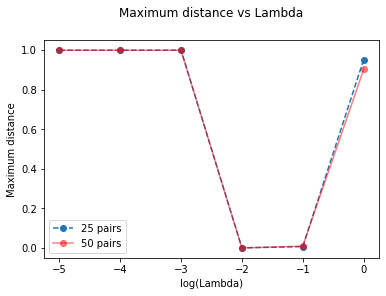

In [37]:
y_50 = np.array([np.max(S_25-e0_25), np.max(S-e1), np.max(S-e2), np.max(S-e3), np.max(S-e4), np.max(S-e5)])
y_25 = np.array([np.max(S-e0), np.max(S_25-e1_25), np.max(S_25-e2_25), np.max(S_25-e3_25), np.max(S_25-e4_25), np.max(S_25-e5_25)])

x = np.array([0, -1,-2,-3,-4,-5])

plt.plot(x,y_25, label='25 pairs', linestyle='dashed', marker='o')
plt.plot(x,y_50, label='50 pairs', alpha=0.5, color='red', marker='o')

plt.ylabel('Maximum distance')
plt.xlabel('log(Lambda)')
plt.title('Maximum distance vs Lambda', y = 1.08)

plt.legend()
plt.show()

In [38]:
unmatch = pd.read_csv('/Users/shiramichel/Documents/JUSTFAIR/2018_data/unmatched_2018.csv')

In [39]:
fjc = pd.read_csv('/Users/shiramichel/Documents/JUSTFAIR/2018_data/FJC_2018.csv')
ussc = pd.read_csv('/Users/shiramichel/Documents/JUSTFAIR/2018_data/mod_ussc_2018.csv')
matched_2018 = matches

/var/folders/r7/bqljw8h17hsc6g3m8ck8vhjc0000gn/T/ipykernel_29429/792254687.py:1: DtypeWarning: Columns (4,11,42,54,65,96,108,113,120,125) have mixed types. Specify dtype option on import or set low_memory=False.
  fjc = pd.read_csv('/Users/shiramichel/Documents/JUSTFAIR/2018_data/FJC_2018.csv')


In [40]:
fjc['matchFlag'] = fjc.ID.isin(matched_2018.ID).astype(int)
ussc['matchFlag'] = ussc.USSCIDN.isin(matched_2018.USSCIDN).astype(int)

In [41]:
fjc_unmatch = fjc[fjc['matchFlag'] == 0].sample(5)

In [42]:
ussc_unmatch = ussc[ussc['matchFlag'] == 0].sample(5)
ussc_unmatch

,DISTRICT,SAFETY,ZONE,AMTFINEC,AMTREST,AMTTOTAL,COSTSUP,FINE,TOTREST,SENTTOT,...,NWSTAT5,roundSENTTOT,floorSENTTOT,SENTTOT_new,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,matchFlag
31637,39,0.0,D,0,0.0,0,0,0,0,210.00,...,NaN,210.0,210.0,210.00,18922.0,18924.0,NaN,NaN,NaN,0
26221,13,NaN,D,0,0.0,0,0,0,0,121.00,...,NaN,121.0,121.0,121.00,21952.0,21960.0,NaN,NaN,NaN,0
34875,22,NaN,D,0,0.0,0,0,0,0,18.00,...,NaN,18.0,18.0,18.00,181349.0,NaN,NaN,NaN,NaN,0
9597,41,1.0,D,0,0.0,0,0,0,0,112.00,...,NaN,112.0,112.0,112.00,81324.0,81324.0,81324.0,NaN,NaN,0
42305,65,NaN,D,0,0.0,0,0,0,0,12.03,...,NaN,12.0,12.0,12.03,NaN,NaN,NaN,NaN,NaN,0


In [43]:
fjc_unmatch[['ID','SENTMON', 'SENTYR', 'DISTRICT', 'PRISTOT', 'FINETOT', 'PROBTOT', 'FJDcode1', 'FJDcode2', 'FJDcode3', 'FJDcode4', 'FJDcode5', 'FJDcode6', 'FJDcode7', 'FJDcode8', 'FJDcode9', 'FJDcode10', 'matchFlag']]

,ID,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,FJDcode4,FJDcode5,FJDcode6,FJDcode7,FJDcode8,FJDcode9,FJDcode10,matchFlag
35962,4505627,3,2018,70,0.0,0,0,21846,21841,-8,-8,-8,21841,21846,-8,-8,-8,0
29255,4483936,8,2018,55,84.0,0,0,21841,21841,-8,-8,-8,21841,21841,-8,-8,-8,0
16773,4446335,3,2018,41,60.0,0,0,81326,-8,-8,-8,-8,81326,-8,-8,-8,-8,0
53960,4570002,3,2018,31,120.0,0,0,21846,21846,21846,21846,-8,21846,21846,21846,21846,-8,0
42361,4528722,5,2018,74,0.0,0,0,81324,81324,-8,-8,-8,183,81324,81324,-8,-8,0


In [44]:
ussc_unmatch[['USSCIDN','SENTMON', 'SENTYR', 'DISTRICT','SENTTOT_new', 'FINE', 'PROBATN', 'floorSENTTOT', 'roundSENTTOT','USSCcode1', 'USSCcode2', 'USSCcode3', 'USSCcode4', 'USSCcode5', 'matchFlag']]

,USSCIDN,SENTMON,SENTYR,DISTRICT,SENTTOT_new,FINE,PROBATN,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,matchFlag
31637,2472532,6,2018,39,210.00,0,0,210.0,210.0,18922.0,18924.0,NaN,NaN,NaN,0
26221,2466927,5,2018,13,121.00,0,0,121.0,121.0,21952.0,21960.0,NaN,NaN,NaN,0
34875,2475934,7,2018,22,18.00,0,0,18.0,18.0,181349.0,NaN,NaN,NaN,NaN,0
9597,2449708,2,2018,41,112.00,0,0,112.0,112.0,81324.0,81324.0,81324.0,NaN,NaN,0
42305,2483603,8,2018,65,12.03,0,0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,0


In [45]:
fjc_55 = pd.concat([fjc_50, fjc_unmatch],axis=0)
ussc_55 = pd.concat([ussc_50, ussc_unmatch],axis=0)

In [46]:
fjc_unmatch_unbal = fjc[fjc['matchFlag'] == 0].sample(5)
ussc_unmatch_unbal = ussc[ussc['matchFlag'] == 0].sample(7)
fjc_unmatch_unbal = fjc_unmatch_unbal[['ID','SENTMON', 'SENTYR', 'DISTRICT', 'PRISTOT', 'FINETOT', 'PROBTOT', 'FJDcode1', 'FJDcode2', 'FJDcode3', 'FJDcode4', 'FJDcode5', 'FJDcode6', 'FJDcode7', 'FJDcode8', 'FJDcode9', 'FJDcode10', 'matchFlag']]
ussc_unmatch_unbal = ussc_unmatch_unbal[['USSCIDN','SENTMON', 'SENTYR', 'DISTRICT','SENTTOT_new', 'FINE', 'PROBATN', 'floorSENTTOT', 'roundSENTTOT','USSCcode1', 'USSCcode2', 'USSCcode3', 'USSCcode4', 'USSCcode5', 'matchFlag']]
fjc_unbal = pd.concat([fjc_50, fjc_unmatch_unbal],axis=0)
ussc_unbal = pd.concat([ussc_50, ussc_unmatch_unbal],axis=0)

In [47]:
cost_matrix_55 = np.zeros((55,55))

for i in range (55):
    for j in range(55):
        value=0
        for x in range(1,7):
            if ussc_55.iloc[i,x] != fjc_55.iloc[j,x]:
                value=value+1
        new_value=1
        for k in range(9,14):
            if ussc_55.iloc[i,k] == fjc_55.iloc[j,7] or ussc_55.iloc[i,k]== fjc_55.iloc[j,8] or ussc_55.iloc[i,k]== fjc_55.iloc[j,9] or ussc_55.iloc[i,k]== fjc_55.iloc[i,10] or ussc_55.iloc[i,k]== fjc_55.iloc[j,11] or ussc_55.iloc[i,k]== fjc_55.iloc[j,12] or ussc_55.iloc[i,k]== fjc_55.iloc[j,13] or ussc_55.iloc[i,k]== fjc_55.iloc[j,14] or ussc_55.iloc[i,k]== fjc_55.iloc[j,15] or ussc_55.iloc[i,k]== fjc_55.iloc[j,16]:
                new_value=new_value-0.2
        cost_matrix_55[i][j] = value + new_value

np.random.shuffle(cost_matrix_55)
cost_matrix_55

array([[3.6, 3.6, 4.6, ..., 2.6, 3.6, 3.6],
       [6. , 6. , 6. , ..., 6. , 6. , 6. ],
       [4. , 4. , 4.6, ..., 4. , 4. , 4. ],
       ...,
       [6. , 6. , 6. , ..., 5. , 6. , 5.4],
       [4. , 4. , 5. , ..., 2.6, 4. , 4. ],
       [4. , 4. , 4.6, ..., 4. , 3.8, 4. ]])

In [48]:
a = np.ones(55)
b= np.ones(55)
M= cost_matrix_55

S_55 = ot.emd(a,b,M)
S_55

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
unique, counts = np.unique(S_55, return_counts=True)

np.asarray((unique, counts)).T

array([[0.00e+00, 2.97e+03],
       [1.00e+00, 5.50e+01]])

In [50]:
# lambda = 2 * 10^-1
a = np.ones(55)
b= np.ones(55)
M = cost_matrix_55
lambd = 2e-1
e1_55 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S_55-e1_55)

It.  |Err         
-------------------
    0|2.434896e+00|
   10|2.104659e-01|
   20|9.670917e-02|
   30|6.416486e-02|
   40|4.944158e-02|
   50|4.051378e-02|
   60|3.423771e-02|
   70|2.949509e-02|
   80|2.576303e-02|
   90|2.274819e-02|
  100|2.026678e-02|
  110|1.819518e-02|
  120|1.644599e-02|
  130|1.495499e-02|
  140|1.367366e-02|
  150|1.256447e-02|
  160|1.159792e-02|
  170|1.075049e-02|
  180|1.000323e-02|
  190|9.340721e-03|
It.  |Err         
-------------------
  200|8.750352e-03|
  210|8.221730e-03|
  220|7.746242e-03|
  230|7.316720e-03|
  240|6.927162e-03|
  250|6.572528e-03|
  260|6.248556e-03|
  270|5.951635e-03|
  280|5.678683e-03|
  290|5.427063e-03|
  300|5.194506e-03|
  310|4.979051e-03|
  320|4.778993e-03|
  330|4.592847e-03|
  340|4.419311e-03|
  350|4.257240e-03|
  360|4.105620e-03|
  370|3.963554e-03|
  380|3.830241e-03|
  390|3.704967e-03|
It.  |Err         
-------------------
  400|3.587091e-03|
  410|3.476034e-03|
  420|3.371277e-03|
  430|3.272348e-03|
  4

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/bregman.py:517: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


0.59786016040273

In [51]:
# lambda = 2 * 10^-2
a = np.ones(55)
b= np.ones(55)
M = cost_matrix_55
lambd = 2e-2
e2_55 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S_55-e2_55)

It.  |Err         
-------------------
    0|2.607431e+00|
   10|4.442884e-01|
   20|1.427217e-01|
   30|8.631996e-02|
   40|6.285912e-02|
   50|4.982396e-02|
   60|4.144130e-02|
   70|3.555854e-02|
   80|3.118409e-02|
   90|2.779444e-02|
  100|2.508562e-02|
  110|2.286831e-02|
  120|2.101813e-02|
  130|1.944975e-02|
  140|1.810264e-02|
  150|1.693258e-02|
  160|1.590648e-02|
  170|1.499907e-02|
  180|1.419072e-02|
  190|1.346593e-02|
It.  |Err         
-------------------
  200|1.281227e-02|
  210|1.221970e-02|
  220|1.167998e-02|
  230|1.118630e-02|
  240|1.073297e-02|
  250|1.031522e-02|
  260|9.928988e-03|
  270|9.570826e-03|
  280|9.237766e-03|
  290|8.927245e-03|
  300|8.637041e-03|
  310|8.365215e-03|
  320|8.110068e-03|
  330|7.870104e-03|
  340|7.644003e-03|
  350|7.430593e-03|
  360|7.228831e-03|
  370|7.037785e-03|
  380|6.856621e-03|
  390|6.684590e-03|
It.  |Err         
-------------------
  400|6.521015e-03|
  410|6.365287e-03|
  420|6.216852e-03|
  430|6.075209e-03|
  4

0.5006923254376893

In [52]:
# lambda = 2 * 10^-3
a = np.ones(55)
b= np.ones(55)
M = cost_matrix_55
lambd = 2e-3
e3_55 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S_55-e3_55)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/bregman.py:484: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


1.0

In [53]:
# lambda = 2 * 10^-4
a = np.ones(55)
b= np.ones(55)
M = cost_matrix_55
lambd = 2e-4
e4_55 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S_55-e4_55)

1.0

In [54]:
# lambda = 2 * 10^-5
a = np.ones(55)
b= np.ones(55)
M = cost_matrix_55
lambd = 2e-5
e5_55 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S_55-e5_55)

1.0

In [55]:
# lambda = 2 * 10^0
a = np.ones(55)
b= np.ones(55)
M = cost_matrix_55
lambd = 2
e0_55 = ot.sinkhorn(a, b, M, lambd, verbose=True)
np.max(S_55-e5_55)

It.  |Err         
-------------------
    0|1.860072e-01|


1.0

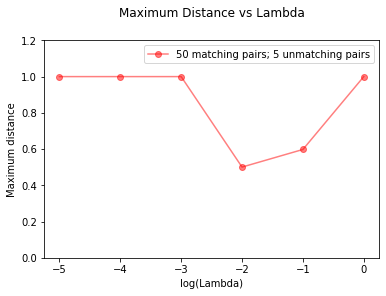

In [56]:
y_55 = np.array([np.max(S_55-e5_55), np.max(S_55-e1_55), np.max(S_55-e2_55), np.max(S_55-e3_55), np.max(S_55-e4_55), np.max(S_55-e5_55), ])

x = np.array([0, -1,-2,-3,-4,-5])

plt.plot(x,y_55, label='50 matching pairs; 5 unmatching pairs', alpha=0.5, color='red', marker='o')
plt.ylim(0,1.2)

plt.ylabel('Maximum distance')
plt.xlabel('log(Lambda)')
plt.title('Maximum Distance vs Lambda', y = 1.08)

plt.legend()
plt.show()

It.  |Err         
-------------------
    0|1.860072e-01|


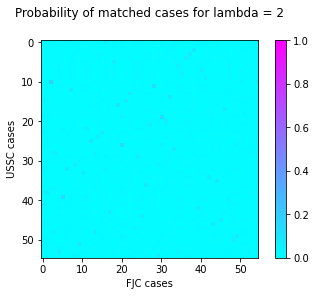

In [57]:
# unbalanced lambda = 2 * 10^0
a = np.ones(55)
b= np.ones(55)
M = cost_matrix_55
lambd = 2
e0_55_u = ot.sinkhorn(a, b, M, lambd, verbose=True)
plt.imshow(e0_55_u, cmap='cool', interpolation='nearest', vmin=0, vmax=1)
plt.xlabel('FJC cases')
plt.ylabel('USSC cases')
plt.title('Probability of matched cases for lambda = 2', y = 1.08)
plt.colorbar()

It.  |Err         
-------------------
    0|2.434896e+00|
   10|2.104659e-01|
   20|9.670917e-02|
   30|6.416486e-02|
   40|4.944158e-02|
   50|4.051378e-02|
   60|3.423771e-02|
   70|2.949509e-02|
   80|2.576303e-02|
   90|2.274819e-02|
  100|2.026678e-02|
  110|1.819518e-02|
  120|1.644599e-02|
  130|1.495499e-02|
  140|1.367366e-02|
  150|1.256447e-02|
  160|1.159792e-02|
  170|1.075049e-02|
  180|1.000323e-02|
  190|9.340721e-03|
It.  |Err         
-------------------
  200|8.750352e-03|
  210|8.221730e-03|
  220|7.746242e-03|
  230|7.316720e-03|
  240|6.927162e-03|
  250|6.572528e-03|
  260|6.248556e-03|
  270|5.951635e-03|
  280|5.678683e-03|
  290|5.427063e-03|
  300|5.194506e-03|
  310|4.979051e-03|
  320|4.778993e-03|
  330|4.592847e-03|
  340|4.419311e-03|
  350|4.257240e-03|
  360|4.105620e-03|
  370|3.963554e-03|
  380|3.830241e-03|
  390|3.704967e-03|
It.  |Err         
-------------------
  400|3.587091e-03|
  410|3.476034e-03|
  420|3.371277e-03|
  430|3.272348e-03|
  4

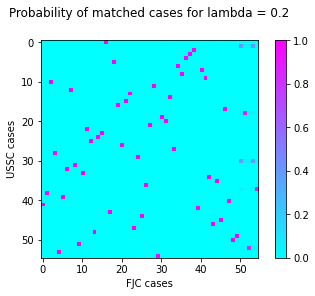

In [58]:
a = np.ones(55)
b= np.ones(55)
M = cost_matrix_55
lambd = 2e-1
e1_55_u = ot.sinkhorn(a, b, M, lambd, verbose=True)
plt.imshow(e1_55_u, cmap='cool', interpolation='nearest', vmin=0, vmax=1)
plt.xlabel('FJC cases')
plt.ylabel('USSC cases')
plt.title('Probability of matched cases for lambda = 0.2', y = 1.08)
plt.colorbar()

In [59]:
np.array(e1_55_u).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

It.  |Err         
-------------------
    0|2.434896e+00|
   10|2.104659e-01|
   20|9.670917e-02|
   30|6.416486e-02|
   40|4.944158e-02|
   50|4.051378e-02|
   60|3.423771e-02|
   70|2.949509e-02|
   80|2.576303e-02|
   90|2.274819e-02|
  100|2.026678e-02|
  110|1.819518e-02|
  120|1.644599e-02|
  130|1.495499e-02|
  140|1.367366e-02|
  150|1.256447e-02|
  160|1.159792e-02|
  170|1.075049e-02|
  180|1.000323e-02|
  190|9.340721e-03|
It.  |Err         
-------------------
  200|8.750352e-03|
  210|8.221730e-03|
  220|7.746242e-03|
  230|7.316720e-03|
  240|6.927162e-03|
  250|6.572528e-03|
  260|6.248556e-03|
  270|5.951635e-03|
  280|5.678683e-03|
  290|5.427063e-03|
  300|5.194506e-03|
  310|4.979051e-03|
  320|4.778993e-03|
  330|4.592847e-03|
  340|4.419311e-03|
  350|4.257240e-03|
  360|4.105620e-03|
  370|3.963554e-03|
  380|3.830241e-03|
  390|3.704967e-03|
It.  |Err         
-------------------
  400|3.587091e-03|
  410|3.476034e-03|
  420|3.371277e-03|
  430|3.272348e-03|
  4

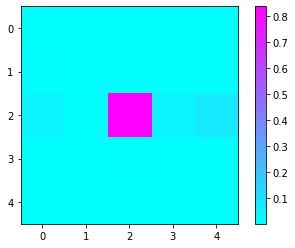

In [60]:
# unbalanced lambda = 2 * 10^-1
a = np.ones(55)
b= np.ones(55)
M = cost_matrix_55
lambd = 2e-1
e1_55_u = ot.sinkhorn(a, b, M, lambd, verbose=True)
plt.imshow(e1_55_u[50:,50:], cmap='cool', interpolation='nearest')
e1_55_u[50:,50:]
plt.colorbar()

In [61]:
e1_55_u[50:,50:]

array([[2.13053869e-04, 2.59261685e-05, 3.40440271e-05, 2.14175450e-04,
        2.10793987e-05],
       [3.71354507e-03, 4.51895081e-04, 8.03065996e-05, 5.05219375e-04,
        4.97242830e-05],
       [3.53113175e-02, 4.29697509e-03, 8.37409402e-01, 3.54972071e-02,
        7.01723727e-02],
       [4.01011008e-05, 4.87983580e-06, 7.02698731e-03, 4.03122052e-05,
        3.96757448e-06],
       [1.46397159e-03, 6.55370789e-05, 1.16466414e-05, 1.99170010e-04,
        7.21137360e-06]])

In [62]:
e1_55_u[:5,:5]

array([[4.36767909e-08, 4.75575754e-07, 4.21758531e-10, 3.67615533e-07,
        2.42378477e-05],
       [1.10516516e-04, 1.20336166e-03, 1.58384527e-04, 9.30187116e-04,
        4.13235961e-04],
       [2.60159618e-08, 2.83275405e-07, 1.85627367e-09, 2.18969193e-07,
        9.72771428e-08],
       [6.02333226e-08, 6.55851935e-07, 5.81634253e-10, 5.06967306e-07,
        2.25220408e-07],
       [1.40194313e-07, 1.52650904e-06, 1.35376584e-09, 1.17997697e-06,
        5.24205191e-07]])

It.  |Err         
-------------------
    0|4.740783e-02|
   10|8.077971e-03|
   20|2.594940e-03|
   30|1.569454e-03|
   40|1.142893e-03|
   50|9.058902e-04|
   60|7.534781e-04|
   70|6.465189e-04|
   80|5.669835e-04|
   90|5.053535e-04|
  100|4.561021e-04|
  110|4.157875e-04|
  120|3.821477e-04|
  130|3.536318e-04|
  140|3.291390e-04|
  150|3.078651e-04|
  160|2.892087e-04|
  170|2.727104e-04|
  180|2.580132e-04|
  190|2.448350e-04|
It.  |Err         
-------------------
  200|2.329504e-04|
  210|2.221764e-04|
  220|2.123633e-04|
  230|2.033872e-04|
  240|1.951449e-04|
  250|1.875494e-04|
  260|1.805271e-04|
  270|1.740150e-04|
  280|1.679594e-04|
  290|1.623135e-04|
  300|1.570371e-04|
  310|1.520948e-04|
  320|1.474558e-04|
  330|1.430928e-04|
  340|1.389819e-04|
  350|1.351017e-04|
  360|1.314333e-04|
  370|1.279597e-04|
  380|1.246658e-04|
  390|1.215380e-04|
It.  |Err         
-------------------
  400|1.185639e-04|
  410|1.157325e-04|
  420|1.130337e-04|
  430|1.104583e-04|
  4

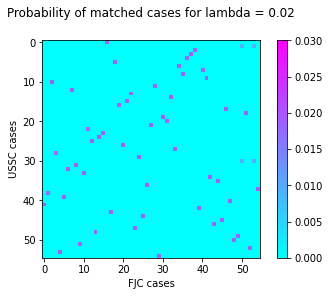

In [63]:
# unbalanced lambda = 2 * 10^-2
a = np.ones(55)/55
b= np.ones(55)/55
M = cost_matrix_55
lambd = 2e-2
e2_55_u = ot.sinkhorn(a, b, M, lambd, verbose=True)
plt.imshow(e2_55_u, cmap='cool', interpolation='nearest', vmin=0, vmax=.03)
plt.xlabel('FJC cases')
plt.ylabel('USSC cases')
plt.title('Probability of matched cases for lambda = 0.02', y = 1.08)
plt.colorbar()

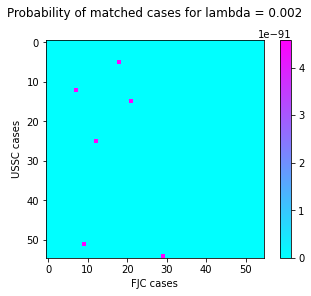

In [64]:
# unbalanced lambda = 2 * 10^-3
a = np.ones(55)/55
b= np.ones(55)/55
M = cost_matrix_55
lambd = 2e-3
e3_55_u = ot.sinkhorn(a, b, M, lambd, verbose=True)
plt.imshow(e3_55_u, cmap='cool', interpolation='nearest')
plt.xlabel('FJC cases')
plt.ylabel('USSC cases')
plt.title('Probability of matched cases for lambda = 0.002', y = 1.08)
plt.colorbar()

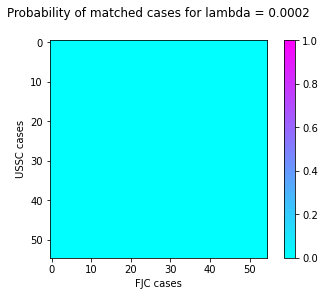

In [65]:
# unbalanced lambda = 2 * 10^-4
a = np.ones(55)
b= np.ones(55)
M = cost_matrix_55
lambd = 2e-4
e4_55_u = ot.sinkhorn(a, b, M, lambd, verbose=True)
plt.imshow(e4_55_u, cmap='cool', interpolation='nearest', vmin=0, vmax=1)
plt.xlabel('FJC cases')
plt.ylabel('USSC cases')
plt.title('Probability of matched cases for lambda = 0.0002', y = 1.08)
plt.colorbar()

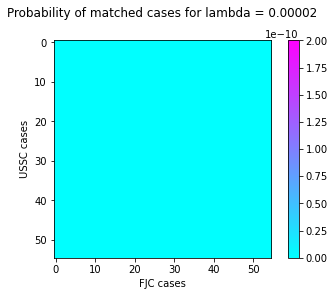

In [66]:
# unbalanced lambda = 2 * 10^-5
a = np.ones(55)
b= np.ones(55)
M = cost_matrix_55
lambd = 2e-5
e5_55_u = ot.sinkhorn(a, b, M, lambd, verbose=True)
plt.imshow(e5_55_u, cmap='cool', interpolation='nearest', vmin=0, vmax=.0000000002)
plt.xlabel('FJC cases')
plt.ylabel('USSC cases')
plt.title('Probability of matched cases for lambda = 0.00002', y = 1.08)
plt.colorbar()

# lambda = 0.002 and lower show row/col sums != 1

In [67]:
# investigate distance discrepancy
cost_matrix_55_2 = np.zeros((55,55))

for i in range (55):
    for j in range(55):
        value=0
        for x in range(1,7):
            if ussc_55.iloc[i,x] != fjc_55.iloc[j,x]:
                value=value+1
        new_value=1
        for k in range(9,14):
            if ussc_55.iloc[i,k] == fjc_55.iloc[j,7] or ussc_55.iloc[i,k]== fjc_55.iloc[j,8] or ussc_55.iloc[i,k]== fjc_55.iloc[j,9] or ussc_55.iloc[i,k]== fjc_55.iloc[i,10] or ussc_55.iloc[i,k]== fjc_55.iloc[j,11] or ussc_55.iloc[i,k]== fjc_55.iloc[j,12] or ussc_55.iloc[i,k]== fjc_55.iloc[j,13] or ussc_55.iloc[i,k]== fjc_55.iloc[j,14] or ussc_55.iloc[i,k]== fjc_55.iloc[j,15] or ussc_55.iloc[i,k]== fjc_55.iloc[j,16]:
                new_value=new_value-0.2
        cost_matrix_55_2[i][j] = value + new_value

cost_matrix_55_2


array([[0.6, 3. , 5. , ..., 4. , 4. , 4. ],
       [3. , 0.8, 5. , ..., 4. , 3. , 4. ],
       [5. , 5. , 0.6, ..., 5. , 4.8, 3. ],
       ...,
       [6. , 6. , 6. , ..., 6. , 6. , 6. ],
       [6. , 6. , 6. , ..., 5. , 6. , 5.4],
       [6. , 6. , 6. , ..., 6. , 6. , 6. ]])

In [68]:
a = np.ones(50)
b= np.ones(50)
M = cost_matrix_55_2[:50,:50]
S_55_2 = ot.emd(a, b, M)

In [69]:
a = np.ones(55)
b= np.ones(55)
M = cost_matrix_55_2
lambd = 2e-0
e0_whole = ot.sinkhorn(a, b, M, lambd, verbose=True)

It.  |Err         
-------------------
    0|1.860072e-01|


In [70]:
a = np.ones(55)
b= np.ones(55)
M = cost_matrix_55_2
lambd = 2e-1
e1_whole = ot.sinkhorn(a, b, M, lambd, verbose=True)

It.  |Err         
-------------------
    0|2.434896e+00|
   10|2.104659e-01|
   20|9.670917e-02|
   30|6.416486e-02|
   40|4.944158e-02|
   50|4.051378e-02|
   60|3.423771e-02|
   70|2.949509e-02|
   80|2.576303e-02|
   90|2.274819e-02|
  100|2.026678e-02|
  110|1.819518e-02|
  120|1.644599e-02|
  130|1.495499e-02|
  140|1.367366e-02|
  150|1.256447e-02|
  160|1.159792e-02|
  170|1.075049e-02|
  180|1.000323e-02|
  190|9.340721e-03|
It.  |Err         
-------------------
  200|8.750352e-03|
  210|8.221730e-03|
  220|7.746242e-03|
  230|7.316720e-03|
  240|6.927162e-03|
  250|6.572528e-03|
  260|6.248556e-03|
  270|5.951635e-03|
  280|5.678683e-03|
  290|5.427063e-03|
  300|5.194506e-03|
  310|4.979051e-03|
  320|4.778993e-03|
  330|4.592847e-03|
  340|4.419311e-03|
  350|4.257240e-03|
  360|4.105620e-03|
  370|3.963554e-03|
  380|3.830241e-03|
  390|3.704967e-03|
It.  |Err         
-------------------
  400|3.587091e-03|
  410|3.476034e-03|
  420|3.371277e-03|
  430|3.272348e-03|
  4

In [71]:
a = np.ones(55)
b= np.ones(55)
M = cost_matrix_55_2
lambd = 2e-2
e2_whole = ot.sinkhorn(a, b, M, lambd, verbose=True)

It.  |Err         
-------------------
    0|2.607431e+00|
   10|4.442884e-01|
   20|1.427217e-01|
   30|8.631996e-02|
   40|6.285912e-02|
   50|4.982396e-02|
   60|4.144130e-02|
   70|3.555854e-02|
   80|3.118409e-02|
   90|2.779444e-02|
  100|2.508562e-02|
  110|2.286831e-02|
  120|2.101813e-02|
  130|1.944975e-02|
  140|1.810264e-02|
  150|1.693258e-02|
  160|1.590648e-02|
  170|1.499907e-02|
  180|1.419072e-02|
  190|1.346593e-02|
It.  |Err         
-------------------
  200|1.281227e-02|
  210|1.221970e-02|
  220|1.167998e-02|
  230|1.118630e-02|
  240|1.073297e-02|
  250|1.031522e-02|
  260|9.928988e-03|
  270|9.570826e-03|
  280|9.237766e-03|
  290|8.927245e-03|
  300|8.637041e-03|
  310|8.365215e-03|
  320|8.110068e-03|
  330|7.870104e-03|
  340|7.644003e-03|
  350|7.430593e-03|
  360|7.228831e-03|
  370|7.037785e-03|
  380|6.856621e-03|
  390|6.684590e-03|
It.  |Err         
-------------------
  400|6.521015e-03|
  410|6.365287e-03|
  420|6.216852e-03|
  430|6.075209e-03|
  4

In [72]:
a = np.ones(55)
b= np.ones(55)
M = cost_matrix_55_2
lambd = 2e-3
e3_whole = ot.sinkhorn(a, b, M, lambd, verbose=True)

In [73]:
a = np.ones(55)
b= np.ones(55)
M = cost_matrix_55_2
lambd = 2e-4
e4_whole = ot.sinkhorn(a, b, M, lambd, verbose=True)

In [74]:
a = np.ones(55)
b= np.ones(55)
M = cost_matrix_55_2
lambd = 2e-5
e5_whole = ot.sinkhorn(a, b, M, lambd, verbose=True)


In [77]:
subset_A_whole = e1_whole[:50,:50]
np.max(S-subset_A_whole)

0.9999999998085742

In [78]:
subset_B_whole = e1_whole[:50,50:55]
np.max(subset_B_whole)

0.019256162468660076

In [79]:
subset_C_whole = e1_whole[50:55,:50]
np.max(subset_C_whole)

0.019552139980154995

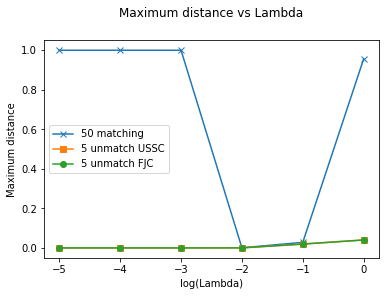

In [80]:
y_A = np.array([np.max(np.abs(S_55_2-e0_whole[:50,:50])), np.max(np.abs(S_55_2-e1_whole[:50,:50])), np.max(np.abs(S_55_2-e2_whole[:50,:50])), np.max(np.abs(S_55_2-e3_whole[:50,:50])), np.max(np.abs(S_55_2-e4_whole[:50,:50])), np.max(np.abs(S_55_2-e5_whole[:50,:50]))])
y_B = np.array([np.max(np.abs(e0_whole[:50,50:55])), np.max(np.abs(e1_whole[:50,50:55])), np.max(np.abs(e2_whole[:50,50:55])), np.max(np.abs(e3_whole[:50,50:55])), np.max(np.abs(e4_whole[:50,50:55])), np.max(np.abs(e5_whole[:50,50:55]))])
y_C = np.array([np.max(np.abs(e0_whole[50:55,:50])), np.max(np.abs(e1_whole[50:55,:50])), np.max(np.abs(e2_whole[50:55,:50])), np.max(np.abs(e3_whole[50:55,:50])), np.max(np.abs(e4_whole[50:55,:50])), np.max(np.abs(e5_whole[50:55,:50]))])

x = np.array([0, -1,-2,-3,-4,-5])

plt.plot(x,y_A, label='50 matching', marker='x')
plt.plot(x,y_B, label='5 unmatch USSC', marker='s')
plt.plot(x,y_C, label='5 unmatch FJC', marker='o')

plt.ylabel('Maximum distance')
plt.xlabel('log(Lambda)')
plt.title('Maximum distance vs Lambda', y = 1.08)

plt.legend()
plt.show()

In [220]:
# shuffle and unshuffle matrix algorithm

#array = S_55_2[:5,:5]
array = np.random.randint(0, 9, (3,3))
print('original data:\n', array)

old_shape = array.shape  # Preserve shape
long_array = np.reshape(array, array.size)  # turn it into a 1xN vector

index = np.arange(0, array.size) # Create a simple 0-N index
np.random.shuffle(index)  # Shuffle the index

long_array = long_array[index]  # Apply shuffled index to the data array

shuffled_array = long_array.reshape(old_shape) # Create the 4x4 shape using the old_shape

print('\nreshaped shuffled array:\n', shuffled_array)

### UNSHUFFLING
# Generate a new linear index and sort the shuffled index to obtain a reverse sort
new = np.vstack([index, np.arange(0,len(index))])
new = new.T

unshuffled_index = new[new[:,0].argsort()].T[1,:]  # Sort the shuffled_index column

# Condensed reshape, re-index, re-shape of the shuffled data
orig = np.reshape(np.reshape(shuffled_array, array.size)[unshuffled_index], old_shape)


print('\noriginal data:\n', orig)

original data:
 [[6 1 3]
 [3 6 7]
 [6 1 0]]

reshaped shuffled array:
 [[1 3 7]
 [6 3 6]
 [0 1 6]]

original data:
 [[6 1 3]
 [3 6 7]
 [6 1 0]]


In [221]:
# Compute the ground truth for the unshuffled data so that the correspond coupling matrix C is the diagonal matrix for the matched records
a = np.ones(3)
b= np.ones(3)
M = cost_matrix_55_2[:3,:3]
C = ot.emd(a, b, M)
C

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [222]:
# Create a random shuffle and compute P
old_shape = cost_matrix_55_2[:3,:3].shape  # Preserve shape
long_array = np.reshape(cost_matrix_55_2[:3,:3], cost_matrix_55_2[:3,:3].size)  # turn it into a 1xN vector

index = np.arange(0, cost_matrix_55_2[:3,:3].size) # Create a simple 0-N index
np.random.shuffle(index)  # Shuffle the index

long_array = long_array[index]  # Apply shuffled index to the data array

shuffled_array = long_array.reshape(old_shape) # Create the 4x4 shape using the old_shape

print('\noriginal array:\n', cost_matrix_55_2[:3,:3])
print('\nreshaped shuffled array:\n', shuffled_array)




original array:
 [[0.6 3.  5. ]
 [3.  0.8 5. ]
 [5.  5.  0.6]]

reshaped shuffled array:
 [[0.6 3.  3. ]
 [0.8 5.  5. ]
 [5.  5.  0.6]]


In [223]:
a = np.ones(3)
b= np.ones(3)
M = shuffled_array
mat = ot.emd(a, b, M)
mat

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

AX = B

A = shuffled

B = cost_matrix_55_2[:3,:3]

determine if matrices are invertible -> determinant of A and B are not zero

multiple both sides by inverse of A


In [224]:
np.linalg.det(cost_matrix_55_2[:3,:3])

109.88799999999992

In [225]:
np.linalg.det(shuffled_array)

-2.640000000000004

In [237]:
inverse_shuf = np.linalg.inv(shuffled_array)
inverse_shuf

array([[ 8.33333333e+00, -5.00000000e+00,  2.66453526e-16],
       [-9.28787879e+00,  5.54545455e+00,  2.27272727e-01],
       [ 7.95454545e+00, -4.54545455e+00, -2.27272727e-01]])

In [227]:
# import sympy as sy
# inverse_shuf = sy.Matrix(shuffled_array).inv()

In [238]:
P_mat = np.dot(inverse_shuf, cost_matrix_55_2[:3,:3])
P_mat

array([[-10.        ,  21.        ,  16.66666667],
       [ 12.2       , -22.29090909, -18.57575758],
       [-10.        ,  19.09090909,  16.90909091]])

In [240]:
result = np.dot(shuffled_array, P_mat)
result

array([[0.6, 3. , 5. ],
       [3. , 0.8, 5. ],
       [5. , 5. , 0.6]])

In [231]:
cost_matrix_55_2[:3,:3]

array([[0.6, 3. , 5. ],
       [3. , 0.8, 5. ],
       [5. , 5. , 0.6]])

In [242]:
a = np.ones(3)
b= np.ones(3)
M = result
ot.emd(a, b, M)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])